In [64]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl


tc = create_taiga_client_v3()

In [65]:
airlines = tc.get(name='nycflights-2013-b1ae', version=1, file='airlines')
airports = tc.get(name='nycflights-2013-b1ae', version=1, file='airports')
flights = tc.get(name='nycflights-2013-b1ae', version=1, file='flights')
planes = tc.get(name='nycflights-2013-b1ae', version=1, file='planes')
weather = tc.get(name='nycflights-2013-b1ae', version=1, file='weather')

In [66]:
batting = tc.get('baseball-ac61.1/Batting')
pitching = tc.get('baseball-ac61.1/Pitching')
fielding = tc.get('baseball-ac61.1/Fielding')

In [67]:
flights['sched_dep_dt']=pd.to_datetime(flights.time_hour) + pd.to_timedelta(flights.minute,unit='m')
flights['dep_dt']=(flights.sched_dep_dt) + pd.to_timedelta(flights.dep_delay,unit='m')


In [68]:
arr_mins = pd.to_timedelta(flights.sched_arr_time % 10 + flights.sched_arr_time % 100,unit='m')
arr_hr = pd.to_timedelta(flights.sched_arr_time//100,unit='hour')
arr_day = flights.dep_dt.dt.floor(freq='d')
arr_dt = arr_day + arr_hr + arr_mins
flights['sched_arr_dt'] = arr_dt


In [69]:
flights.loc[flights.sched_arr_dt < flights.sched_dep_dt,'sched_arr_dt'] += pd.to_timedelta([1]*(flights.sched_arr_dt < flights.sched_dep_dt).sum(),unit='day')

In [70]:
flights['arr_dt'] = flights.sched_arr_dt + pd.to_timedelta(flights.arr_delay,unit='m')

In [71]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 05:00:00,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 05:00:00,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 05:00:00,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,DCA,NaN,213,14,55,2013-09-30 14:00:00,2013-09-30 14:55:00,NaT,NaT,NaT
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,SYR,NaN,198,22,0,2013-09-30 22:00:00,2013-09-30 22:00:00,NaT,NaT,NaT
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,BNA,NaN,764,12,10,2013-09-30 12:00:00,2013-09-30 12:10:00,NaT,NaT,NaT
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,CLE,NaN,419,11,59,2013-09-30 11:00:00,2013-09-30 11:59:00,NaT,NaT,NaT


In [72]:
flights.dtypes

year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour                 object
sched_dep_dt      datetime64[ns]
dep_dt            datetime64[ns]
sched_arr_dt      datetime64[ns]
arr_dt            datetime64[ns]
dtype: object

In [73]:
flights.isna().mean()

year              0.000000
month             0.000000
day               0.000000
dep_time          0.024512
sched_dep_time    0.000000
dep_delay         0.024512
arr_time          0.025872
sched_arr_time    0.000000
arr_delay         0.028001
carrier           0.000000
flight            0.000000
tailnum           0.007459
origin            0.000000
dest              0.000000
air_time          0.028001
distance          0.000000
hour              0.000000
minute            0.000000
time_hour         0.000000
sched_dep_dt      0.000000
dep_dt            0.024512
sched_arr_dt      0.024512
arr_dt            0.028001
dtype: float64

In [74]:
flights.nunique()

year                   1
month                 12
day                   31
dep_time            1318
sched_dep_time      1021
dep_delay            527
arr_time            1411
sched_arr_time      1163
arr_delay            577
carrier               16
flight              3844
tailnum             4043
origin                 3
dest                 105
air_time             509
distance             214
hour                  20
minute                60
time_hour           6936
sched_dep_dt      127328
dep_dt            211717
sched_arr_dt      145352
arr_dt            219685
dtype: int64

In [75]:
flights.describe()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000,336776,328521,328521,327346
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100,2013-07-03 05:28:50.290994944,2013-07-03 17:42:40.203274752,2013-07-03 19:59:33.335768064,2013-07-03 20:39:13.690101760
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 07:12:00,2013-01-01 07:08:00
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000,2013-04-04 13:29:00,2013-04-05 06:38:00,2013-04-05 09:12:00,2013-04-05 08:00:00
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000,2013-07-03 10:30:00,2013-07-04 09:29:00,2013-07-04 12:04:00,2013-07-04 12:01:30
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000,2013-10-01 07:00:00,2013-10-01 16:38:00,2013-10-01 19:00:00,2013-10-01 20:14:45
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,2013-12-31 23:59:00,2014-01-01 00:26:00,2014-01-01 23:56:00,2014-01-02 01:32:00
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846,NaN,NaN,NaN,NaN


In [76]:
flights_nc = flights[~(flights.dep_time.isna() | flights.arr_time.isna())]
#this in R would be like filter out !
# this can also be written as
flights_nc = flights.loc[~(flights.dep_time.isna() | flights.arr_time.isna()),:]

flights_nc

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 05:00:00,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 05:00:00,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 05:00:00,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,SYR,41.0,209,22,45,2013-09-30 22:00:00,2013-09-30 22:45:00,2013-09-30 22:40:00,2013-09-30 23:52:00,2013-09-30 23:35:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,BUF,52.0,301,22,50,2013-09-30 22:00:00,2013-09-30 22:50:00,2013-09-30 22:40:00,2013-10-01 00:14:00,2013-09-30 23:54:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,ROC,47.0,264,22,46,2013-09-30 22:00:00,2013-09-30 22:46:00,2013-09-30 22:41:00,2013-10-01 00:02:00,2013-09-30 23:46:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,BOS,33.0,187,22,55,2013-09-30 22:00:00,2013-09-30 22:55:00,2013-09-30 23:07:00,2013-10-01 00:06:00,2013-10-01 00:07:00


Text(0, 0.5, '"excess" arrival delay')

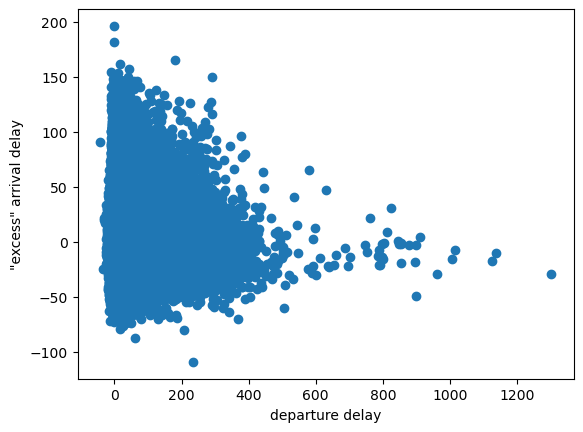

In [77]:
plt.scatter(flights_nc.dep_delay, flights_nc.arr_delay - flights_nc.dep_delay)
plt.xlabel('departure delay')
plt.ylabel('"excess" arrival delay')

In [78]:
flights_nc.groupby('origin').dep_delay.mean()
#this shows the averaged delay of a flight leaving each airport

origin
EWR    15.035216
JFK    12.044673
LGA    10.298725
Name: dep_delay, dtype: float64

In [79]:
flights_nc.groupby('origin').dep_delay.std()
#we notice that std makes means overlap so the delay is not related to the airport you are leaving from

origin
EWR    41.198540
JFK    38.863810
LGA    39.923435
Name: dep_delay, dtype: float64

In [80]:
flights_nc.sort_values('origin').iloc[:,:14]
flights_nc.groupby('dest').dep_delay.mean().sort_values()

dest
LEX    -9.000000
PSP    -2.944444
EYW     3.647059
STT     4.613900
XNA     6.362189
         ...    
TYS    28.382353
BHM    29.014870
OKC    29.853583
CAE    33.811321
TUL    34.784512
Name: dep_delay, Length: 104, dtype: float64

In [81]:
flights_nc[flights_nc.dest=='LEX'] #there is only one value that's why the std was null

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
77948,2013,11,24,2026.0,2035,-9.0,2227.0,2249,-22.0,9E,...,LEX,90.0,604,20,35,2013-11-24 20:00:00,2013-11-24 20:35:00,2013-11-24 20:26:00,2013-11-24 22:58:00,2013-11-24 22:36:00


Text(0, 0.5, 'destination delay dep std')

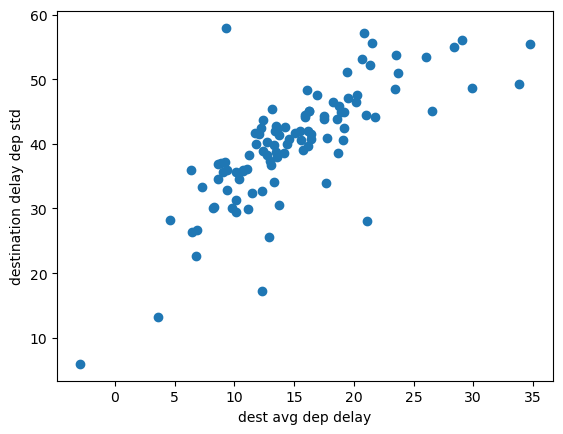

In [82]:
plt.scatter(flights_nc.groupby('dest').dep_delay.mean(),
            flights_nc.groupby('dest').dep_delay.std())
plt.xlabel('dest avg dep delay')
plt.ylabel('destination delay dep std')

In [83]:
dfg_dest = flights_nc.groupby('dest')
dfg_dest.agg({'dep_delay':['mean', 'std']})

dep_delay           
           mean        std
dest                      
ABQ   13.740157  30.526011
ACK    6.456604  26.320270
ALB   23.447368  48.486180
ANC   12.875000  25.592619
ATL   12.443904  43.752597
...         ...        ...
TPA   12.109130  41.531693
TUL   34.784512  55.427034
TVC   21.536842  55.640910
TYS   28.382353  55.012280
XNA    6.362189  35.901705

[104 rows x 2 columns]

In [84]:
dfg_dest.agg({'dep_delay':['mean', 'std']}).corr()

dep_delay          
                    mean       std
dep_delay mean  1.000000  0.757348
          std   0.757348  1.000000

In [85]:
dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std'])) 
#mean and std of plane velocity stratified by airport destinations, does the plane fly fatser to specific destinations

/tmp/ipykernel_35986/3655157628.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std']))


,mean,std
dest,,
ABQ,7.370106,0.544402
ACK,4.815894,0.509358
ALB,4.538350,0.415422
ANC,8.166432,0.292883
ATL,6.753035,0.566571
...,...,...
TPA,6.984943,0.521179
TUL,6.873666,0.624483
TVC,6.901976,0.449430


In [86]:
dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std'])) .corr()
#not very well corelated they are a bit more independent


/tmp/ipykernel_35986/1759317430.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std'])) .corr()


,mean,std
mean,1.000000,-0.223107
std,-0.223107,1.000000


In [87]:
dfg_dest.groups

{'ABQ': [27881, 28867, 29830, 30848, 31579, 32436, 33314, 34410, 35366, 36326, 37307, 38086, 38933, 39916, 40960, 41860, 42859, 43839, 44588, 45450, 46430, 47417, 48382, 49387, 50344, 51087, 51942, 52927, 53906, 54874, 55804, 56729, 57514, 58376, 59351, 60320, 61287, 62239, 63252, 64035, 64855, 65856, 66828, 67811, 68799, 69781, 70552, 71340, 72357, 73359, 74323, 75334, 76327, 77114, 77927, 78916, 79883, 80845, 81623, 82253, 83061, 84021, 85045, 86041, 87002, 87791, 88855, 89660, 90448, 91393, 92231, 93349, 94313, 95284, 95937, 96855, 97816, 98732, 99735, 100722, 101651, 102501, 103360, 104342, 105167, 105881, 106777, 107753, 108570, 109421, 110407, 111229, 185558, 186716, 187700, 188693, 189680, 190500, 191383, 192361, ...], 'ACK': [27377, 28354, 29331, 30090, 30318, 31242, 31725, 31929, 32697, 32939, 33946, 34868, 35849, 36622, 36834, 37761, 38241, 38442, 39184, 39417, 43350, 44956, 49862, 207754, 208732, 209699, 210405, 211367, 212357, 213371, 214143, 214310, 215048, 215254, 216006,

In [88]:
df_tail_agg = flights_nc.groupby('tailnum').agg({'arr_delay':['mean', 'std', 'count']})
df_tail_agg.corr()

arr_delay                    
                     mean       std     count
arr_delay mean   1.000000  0.733224 -0.010966
          std    0.733224  1.000000  0.077598
          count -0.010966  0.077598  1.000000

In [89]:
#waht destinations have the most carriers?
flights_nc.groupby('dest').carrier.nunique().sort_values(ascending=False).iloc[:20] 
#.ioc shows top 20

dest
ATL    7
BOS    7
CLT    7
ORD    7
TPA    7
DTW    6
DCA    6
AUS    6
IAD    6
MSP    6
STL    6
PIT    6
MSY    6
BNA    5
PHX    5
RDU    5
PBI    5
LAX    5
IND    5
PHL    5
Name: carrier, dtype: int64

<Axes: >

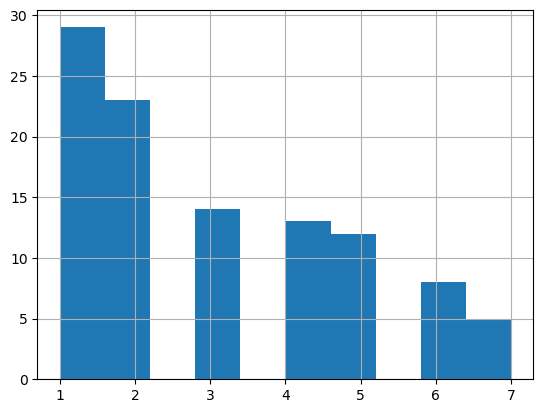

In [90]:
flights_nc.groupby('dest').carrier.nunique().hist()

<Axes: >

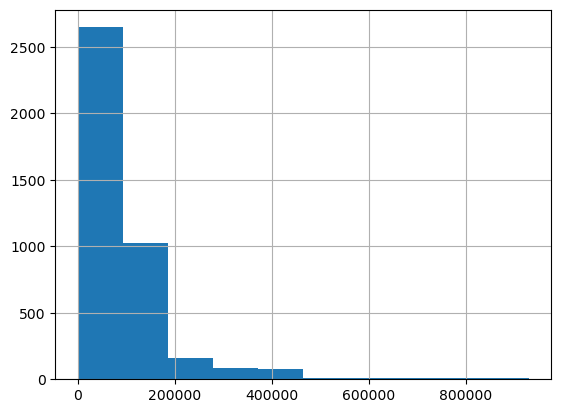

In [91]:
flights_nc.groupby('tailnum').distance.sum().hist()

Text(0, 0.5, 'number of planes')

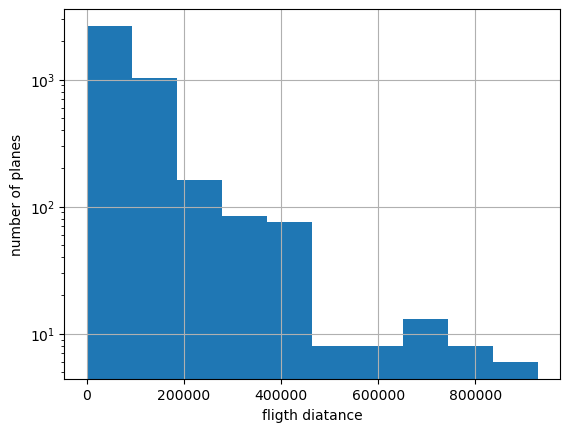

In [92]:
#better way of visualizing things when you have a big y scale
flights_nc.groupby('tailnum').distance.sum().hist()
plt.yscale('log')
plt.xlabel('fligth diatance')
plt.ylabel('number of planes') 

In [93]:
flights_nc[flights_nc.dep_dt.dt.hour<5] 
#use the dt attribute of a date time column, and you can extract the hours
#we can see hte flights that are in the 4 hours of the day

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
842,2013,1,2,42.0,2359,43.0,518.0,442,36.0,B6,...,SJU,189.0,1598,23,59,2013-01-02 23:00:00,2013-01-02 23:59:00,2013-01-03 00:42:00,2013-01-03 04:44:00,2013-01-03 05:20:00
843,2013,1,2,126.0,2250,156.0,233.0,2359,154.0,B6,...,SYR,49.0,209,22,50,2013-01-02 22:00:00,2013-01-02 22:50:00,2013-01-03 01:26:00,2013-01-04 00:08:00,2013-01-04 02:42:00
844,2013,1,2,458.0,500,-2.0,703.0,650,13.0,US,...,CLT,108.0,529,5,0,2013-01-02 05:00:00,2013-01-02 05:00:00,2013-01-02 04:58:00,2013-01-02 06:50:00,2013-01-02 07:03:00
1785,2013,1,3,32.0,2359,33.0,504.0,442,22.0,B6,...,SJU,193.0,1598,23,59,2013-01-03 23:00:00,2013-01-03 23:59:00,2013-01-04 00:32:00,2013-01-04 04:44:00,2013-01-04 05:06:00
1786,2013,1,3,50.0,2145,185.0,203.0,2311,172.0,B6,...,BUF,58.0,301,21,45,2013-01-03 21:00:00,2013-01-03 21:45:00,2013-01-04 00:50:00,2013-01-04 23:12:00,2013-01-05 02:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331219,2013,9,25,451.0,500,-9.0,636.0,648,-12.0,US,...,CLT,84.0,529,5,0,2013-09-25 05:00:00,2013-09-25 05:00:00,2013-09-25 04:51:00,2013-09-25 06:56:00,2013-09-25 06:44:00
332195,2013,9,26,451.0,500,-9.0,619.0,648,-29.0,US,...,CLT,72.0,529,5,0,2013-09-26 05:00:00,2013-09-26 05:00:00,2013-09-26 04:51:00,2013-09-26 06:56:00,2013-09-26 06:27:00
333191,2013,9,27,453.0,500,-7.0,627.0,648,-21.0,US,...,CLT,76.0,529,5,0,2013-09-27 05:00:00,2013-09-27 05:00:00,2013-09-27 04:53:00,2013-09-27 06:56:00,2013-09-27 06:35:00
334187,2013,9,28,451.0,500,-9.0,627.0,648,-21.0,US,...,CLT,77.0,529,5,0,2013-09-28 05:00:00,2013-09-28 05:00:00,2013-09-28 04:51:00,2013-09-28 06:56:00,2013-09-28 06:35:00


In [94]:
#look at the cancelled flights
#number
#is there a pattern 
#is the proportion of cancelled flights related to the average delay
#which carrier has the worst delays: Can you disentagle the effects of airports vs bad carriers? (think about grouping by carrier and destination at the same time)
#count and nunique are common ways of looking at a dataset. When do you use one vs the other

In [95]:
flights.groupby(['day'])

In [96]:
dfg_day = flights.groupby(['day', 'month'])
dfg_day.dep_delay.mean()

day  month
1    1        11.548926
     2        10.852909
     3        11.015890
     4        12.421436
     5         2.903427
                ...    
31   5         9.274227
     7         6.280843
     8         4.587278
     10        5.163577
     12        6.996053
Name: dep_delay, Length: 365, dtype: float64

In [97]:
flights_c = flights[(flights.dep_time.isna() | flights.arr_time.isna())]
flights_c.month.sort_values()
flights_c.sched_dep_dt.dt.day_of_year.sort_values()
flights_c.sched_dep_dt.dt.day_of_year.value_counts()
canceled_day_counts = flights_c.sched_dep_dt.dt.day_of_year.value_counts().sort_index()
canceled_day_counts




sched_dep_dt
1       5
2      10
3      10
4       6
5       3
       ..
361     2
362     1
363    19
364    14
365    16
Name: count, Length: 359, dtype: int64

In [98]:
flights_nc['day_of_year'] = flights_nc.sched_dep_dt.dt.day_of_year
flights_nc['day_of_year']

/tmp/ipykernel_35986/221453508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_nc['day_of_year'] = flights_nc.sched_dep_dt.dt.day_of_year


0           1
1           1
2           1
3           1
4           1
         ... 
336765    273
336766    273
336767    273
336768    273
336769    273
Name: day_of_year, Length: 328063, dtype: int32

In [99]:
flights_nc.groupby('day_of_year').agg({'dep_delay':['mean', 'std', 'count']})

dep_delay                 
                  mean        std count
day_of_year                            
1            11.507766  45.272714   837
2            13.875670  37.243970   933
3            10.987832  31.457346   904
4             8.951595  27.734262   909
5             5.732218  25.734261   717
...                ...        ...   ...
361          10.957336  28.467219   961
362           7.981550  25.743159   813
363          22.309551  46.629060   869
364          10.698113  31.993950   954
365           6.996053  26.287029   760

[365 rows x 3 columns]

In [100]:
flights_c.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
count,8713.0,8713.000000,8713.000000,458.000000,8713.000000,458.000000,0.0,8713.000000,0.0,8713.000000,0.0,8713.000000,8713.000000,8713.000000,8713,458,458,0
mean,2013.0,5.958223,14.622403,1529.786026,1489.876392,57.834061,NaN,1666.990359,NaN,3049.756685,NaN,704.282452,14.641455,25.730862,2013-06-14 06:18:19.687822592,2013-07-01 16:58:52.139737856,2013-07-01 18:12:05.502183424,NaT
min,2013.0,1.000000,1.000000,146.000000,106.000000,-14.000000,NaN,1.000000,NaN,1.000000,NaN,17.000000,1.000000,0.000000,2013-01-01 06:00:00,2013-01-01 20:16:00,2013-01-01 22:20:00,NaT
25%,2013.0,3.000000,8.000000,1233.500000,1159.000000,-2.000000,NaN,1330.000000,NaN,1531.000000,NaN,292.000000,11.000000,5.000000,2013-03-07 18:35:00,2013-04-24 20:49:45,2013-04-25 00:13:00,NaT
50%,2013.0,6.000000,12.000000,1580.500000,1557.000000,26.500000,NaN,1747.000000,NaN,3525.000000,NaN,589.000000,15.000000,28.000000,2013-06-13 14:45:00,2013-07-06 19:39:30,2013-07-06 22:49:00,NaT
75%,2013.0,8.000000,22.000000,1901.750000,1850.000000,95.750000,NaN,2046.000000,NaN,4370.000000,NaN,888.000000,18.000000,42.000000,2013-08-22 17:00:00,2013-09-04 20:48:00,2013-09-04 19:56:00,NaT
max,2013.0,12.000000,31.000000,2334.000000,2359.000000,634.000000,NaN,2359.000000,NaN,6177.000000,NaN,4963.000000,23.000000,59.000000,2013-12-31 20:25:00,2013-12-27 09:47:00,2013-12-27 12:30:00,NaT
std,0.0,3.413378,8.377608,466.073775,443.428054,81.700705,NaN,461.455672,NaN,1677.462338,NaN,520.786324,4.421906,19.425442,NaN,NaN,NaN,NaN


In [101]:
flights_c = flights[(flights.dep_time.isna() | flights.arr_time.isna())]


In [102]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 05:00:00,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 05:00:00,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 05:00:00,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,DCA,NaN,213,14,55,2013-09-30 14:00:00,2013-09-30 14:55:00,NaT,NaT,NaT
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,SYR,NaN,198,22,0,2013-09-30 22:00:00,2013-09-30 22:00:00,NaT,NaT,NaT
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,BNA,NaN,764,12,10,2013-09-30 12:00:00,2013-09-30 12:10:00,NaT,NaT,NaT
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,CLE,NaN,419,11,59,2013-09-30 11:00:00,2013-09-30 11:59:00,NaT,NaT,NaT


In [103]:
#exercice number 2
df_flights_small = flights [['sched_dep_dt','dep_dt','sched_arr_dt','arr_dt','origin','dest','tailnum','carrier']]


In [104]:
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [107]:
df_flights_small.merge(airlines, left_on='carrier',right_on='carrier')

,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt,origin,dest,tailnum,carrier,name
0,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00,EWR,IAH,N14228,UA,United Air Lines Inc.
1,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00,LGA,IAH,N24211,UA,United Air Lines Inc.
2,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00,JFK,MIA,N619AA,AA,American Airlines Inc.
3,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00,JFK,BQN,N804JB,B6,JetBlue Airways
4,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00,LGA,ATL,N668DN,DL,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...
336771,2013-09-30 14:55:00,NaT,NaT,NaT,JFK,DCA,None,9E,Endeavor Air Inc.
336772,2013-09-30 22:00:00,NaT,NaT,NaT,LGA,SYR,None,9E,Endeavor Air Inc.
336773,2013-09-30 12:10:00,NaT,NaT,NaT,LGA,BNA,N535MQ,MQ,Envoy Air
336774,2013-09-30 11:59:00,NaT,NaT,NaT,LGA,CLE,N511MQ,MQ,Envoy Air


In [ ]:
pd.merge(df1,df2,on='key') #just syntax